In [18]:
import numpy as np
import pandas as pd



In [19]:
wine_data = pd.read_csv("winequality-red.csv")

wine_data.head()
wine_data.shape

(1599, 12)

In [20]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [21]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [22]:
wine_data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [23]:
X_alcohol = wine_data[['alcohol']]
y = wine_data['quality']


In [24]:
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X_alcohol, y, test_size=0.2, random_state=42
)

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = model.predict(X_test)
y_pred

array([5.32751526, 5.29128379, 5.43620967, 5.3999782 , 5.68982996,
       5.25505232, 5.36374673, 5.47244114, 5.3999782 , 5.79852436,
       6.12460759, 5.4543254 , 5.36374673, 5.18258938, 5.25505232,
       6.30576493, 5.50867261, 5.47244114, 6.08837612, 5.32751526,
       5.79852436, 5.11012645, 6.233302  , 6.48692228, 5.3999782 ,
       5.29128379, 6.19707053, 5.61736702, 5.25505232, 5.50867261,
       5.3999782 , 5.50867261, 5.32751526, 5.47244114, 5.43620967,
       5.21882085, 5.90721877, 5.68982996, 5.61736702, 6.01591318,
       5.43620967, 5.25505232, 5.65359849, 5.3999782 , 5.25505232,
       5.65359849, 5.76229289, 5.21882085, 5.79852436, 5.61736702,
       5.21882085, 5.11012645, 5.83475583, 6.52315375, 5.21882085,
       5.14635792, 5.90721877, 5.58113555, 5.79852436, 5.3999782 ,
       5.47244114, 5.68982996, 5.18258938, 5.25505232, 6.16083906,
       5.18258938, 6.12460759, 5.36374673, 6.16083906, 5.29128379,
       6.41445934, 5.25505232, 5.25505232, 5.90721877, 6.19707

In [38]:
print(model.score(X_test, y_test))

0.23561797203963397


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [40]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.4995281340730443
Mean Absolute Error: 0.5749664687393711


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

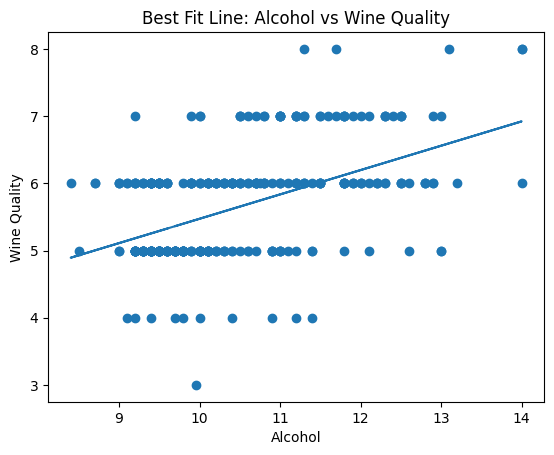

In [42]:
plt.figure()
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.xlabel("Alcohol")
plt.ylabel("Wine Quality")
plt.title("Best Fit Line: Alcohol vs Wine Quality")
plt.show()
